<ipython-input-2-bb95b4a57037>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

ARIMA Forecast:
1418     8207.874276
1419     9079.150519
1420    10438.642101
1421     8651.344543
1422     9796.381300
1423     8358.985173
1424     9015.318874
1425     9210.978466
1426     9237.798918
1427     9042.030847
1428     9123.152512
1429     9008.733761
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5slsqbm0/kpaqdkmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5slsqbm0/cme3kgkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71414', 'data', 'file=/tmp/tmp5slsqbm0/kpaqdkmm.json', 'init=/tmp/tmp5slsqb

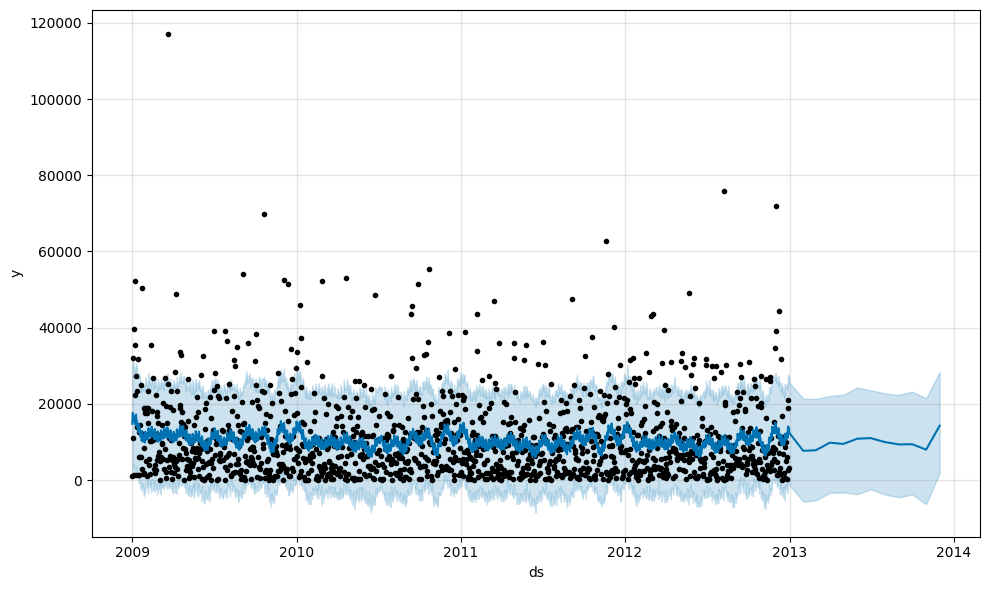

Linear Regression MSE: 5238802.671460603
Logistic Regression Accuracy: 0.6238095238095238


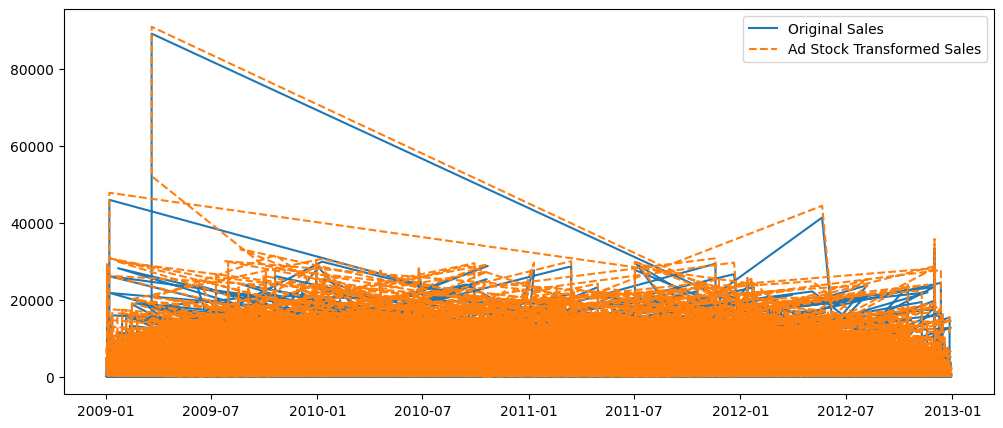

Analysis Complete!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

# Load Dataset
file_path = "ORDERS.csv"  # Change this if running locally
df = pd.read_csv(file_path, encoding='latin1')
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Time Series Analysis
df_time_series = df[['ORDERDATE', 'SALES']].groupby("ORDERDATE").sum().reset_index()
df_time_series.set_index("ORDERDATE", inplace=True)

# ARIMA Model
arima_model = ARIMA(df_time_series, order=(5,1,0))
arima_result = arima_model.fit()
print("ARIMA Forecast:")
print(arima_result.forecast(steps=12))

# Prophet Model
df_prophet = df_time_series.reset_index().rename(columns={"ORDERDATE": "ds", "SALES": "y"})
prophet_model = Prophet()
prophet_model.fit(df_prophet)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_forecast = prophet_model.predict(future)
prophet_model.plot(prophet_forecast)
plt.show()

# Regression Analysis
X = df[['ORDERQUANTITY', 'DISCOUNT', 'UNITPRICE', 'SHIPPINGCOSTS']]
y = df['SALES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
reg_predictions = reg_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, reg_predictions))

# Logistic Regression
median_profit = df['PROFIT'].median()
df['HighProfit'] = (df['PROFIT'] > median_profit).astype(int)
X_log = df[['ORDERQUANTITY', 'DISCOUNT', 'UNITPRICE', 'SHIPPINGCOSTS']]
y_log = df['HighProfit']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(X_train_log, y_train_log)
log_predictions = log_model.predict(X_test_log)
print("Logistic Regression Accuracy:", accuracy_score(y_test_log, log_predictions))

# Ad Stock and Saturation Analysis
def adstock_transform(data, decay_rate=0.5):
    adstocked = np.zeros(len(data))
    for i in range(1, len(data)):
        adstocked[i] = data[i] + decay_rate * adstocked[i-1]
    return adstocked

df['AdStock_Sales'] = adstock_transform(df['SALES'])
plt.figure(figsize=(12, 5))
plt.plot(df['ORDERDATE'], df['SALES'], label='Original Sales')
plt.plot(df['ORDERDATE'], df['AdStock_Sales'], label='Ad Stock Transformed Sales', linestyle='dashed')
plt.legend()
plt.show()

print("Analysis Complete!")


In [3]:
pip install prophet